In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
df = pd.read_csv("C://Users//82104//Desktop//Ai프로젝트//Medicalpremium.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
df['synthesis_1'] = df['AnyTransplants'] * df['AnyChronicDiseases']
df['synthesis_2'] = df['AnyTransplants'] * df['NumberOfMajorSurgeries']
df['synthesis_3'] = df['NumberOfMajorSurgeries'] * df['AnyChronicDiseases']
df['synthesis_4'] = df['AnyTransplants'] + df['AnyChronicDiseases'] + df['NumberOfMajorSurgeries']
df['synthesis_5'] = df['BloodPressureProblems'] + df['NumberOfMajorSurgeries']

In [8]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,synthesis_1,synthesis_2,synthesis_3,synthesis_4,synthesis_5
0,45,0,0,0,0,155,57,0,0,0,25000,0,0,0,0,0
1,60,1,0,0,0,180,73,0,0,0,29000,0,0,0,0,0
2,36,1,1,0,0,158,59,0,0,1,23000,0,0,0,1,2
3,52,1,1,0,1,183,93,0,0,2,28000,0,0,2,3,3
4,38,0,0,0,1,166,88,0,0,1,23000,0,0,1,2,1


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='PremiumPrice',axis=1)
Y = df['PremiumPrice']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 20, 30, 50, 100, 150, 200],
    'max_depth':[5, 7, 10, 15, 20],
    'min_samples_leaf':[1, 2, 5, 7, 10, 15],
    'min_samples_split':[1, 2, 5, 7, 10, 15]
}

rf_reg = RandomForestRegressor(random_state=0) 
grid_cv = GridSearchCV(rf_reg, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, Y_train)
print('최적의 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

C:\Users\82104\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
420 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
420 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82104\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82104\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\82104\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\82104\anaconda3\Lib\site-packa

최적의 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 20}
최고 예측 정확도:0.7413


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from math import sqrt
def adjusted_r2_score(y_true, y_pred, n_features, n_samples):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1)) / (n_samples - n_features - 1)
    return adjusted_r2

models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_split=10, min_samples_leaf=20),
    "RF": RandomForestRegressor(n_estimators=50, max_depth=15, min_samples_leaf=2, min_samples_split=4, bootstrap=True),
    "GradientBoosting": GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, max_depth=10, min_samples_leaf=10),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(256, 128, 64), activation='relu', learning_rate='adaptive', batch_size=64, max_iter=300, early_stopping=True),
    "LightGBM": lgb.LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=200, max_depth=3, min_child_samples=80, colsample_bytree=0.6),
    "AdaBoost" : AdaBoostRegressor(n_estimators=50, learning_rate=0.01, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000),
    "Lasso": Lasso(alpha=0.1, max_iter=1000),
    "Ridge": Ridge(alpha=0.1, max_iter=1000)
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(f'Score is {model.score(X_test, Y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(Y_train, model.predict(X_train))}')
    print(f'Testing R-squared: {r2_score(Y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(Y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(Y_test, y_pred)}')

Training Model LR 
-----------------------------------------------
Score is 0.7218350405543559
Training R-squared: 0.6337588161308307
Testing R-squared: 0.7218350405543559
Mean Squared Error: 11861730.382678442
Mean Absolute Error: 2547.1153376972325
Training Model DT 
-----------------------------------------------
Score is 0.8793249474437426
Training R-squared: 0.7676052395194115
Testing R-squared: 0.8793249474437426
Mean Squared Error: 5145921.111668949
Mean Absolute Error: 1357.778804266782
Training Model RF 
-----------------------------------------------
Score is 0.9020741256625259
Training R-squared: 0.9152642954634416
Testing R-squared: 0.9020741256625259
Mean Squared Error: 4175832.646908744
Mean Absolute Error: 957.7817059483722
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8905906826626235
Training R-squared: 0.9253407937272619
Testing R-squared: 0.8905906826626235
Mean Squared Error: 4665518.713051504
Mean Absolute Error: 1192.5

C:\Users\82104\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Score is 0.7407113432497212
Training R-squared: 0.6556950762062116
Testing R-squared: 0.7407113432497212
Mean Squared Error: 11056792.141569737
Mean Absolute Error: 2349.4856341313366
Training Model LightGBM 
-----------------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 11
[LightGBM] [Info] Start training from score 24269.035533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

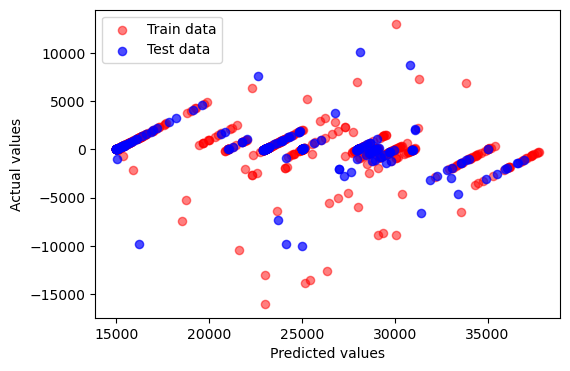

In [9]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

from sklearn.ensemble import AdaBoostRegressor as ada
GBM = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, max_depth=10, min_samples_leaf=10)
GBM.fit(X_train, Y_train)

X_train_predic = RF.predict(X_train)
X_test_predic = RF.predict(X_test)

# Train data
plt.scatter(X_train_predic, X_train_predic - Y_train, c = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(X_test_predic, X_test_predic - Y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')

# plt.xlabel("Predicted values")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')


In [16]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# 모델 학습 및 예측
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# R-squared 계산
r2 = r2_score(Y_test, y_pred)

# 결과 출력
print("R-squared:", r2)

R-squared: 0.8748514239505469


In [22]:
# 랜덤 데이터 넣어 결과 예측
input_data = (30,0,0,0,0,180,70,0,0,0,0,0,0,0,0)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ', str(prediction))

Predicted Medical Insurance Cost :  [21845.55737281]


C:\Users\82104\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [24]:
# 평균값과 비교해보기
mean = df[df['Age'] == 30]['PremiumPrice'].mean()
mean

23727.272727272728